<a href="https://colab.research.google.com/github/kyochanpy/forest_bears/blob/main/nb_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
all_df = pd.read_csv('/content/drive/MyDrive/forest_bears/all_df.csv')

In [ ]:
all_df.columns

Index(['No.', '区', '発生日時', '出没場所', '状況', 'lat', 'lng', 'KEY_CODE', '年度', '年',
       '月', '日', '曜日', '時間', '人口', '平均気温', '天候（昼）_1', '天候（昼）_2', '天候（夜）_1',
       '天候（夜）_2', 'geometry'],
      dtype='object')

In [ ]:
all_df["人口"]

0        67
1         0
2         0
3      1417
4         0
       ... 
558       0
559       6
560      41
561       0
562     546
Name: 人口, Length: 563, dtype: int64

In [ ]:
len(df[df["人口"] != 0])

In [ ]:
df = all_df[all_df["年度"] == 2017]

In [ ]:
len(df[df["人口"] != 0])

56

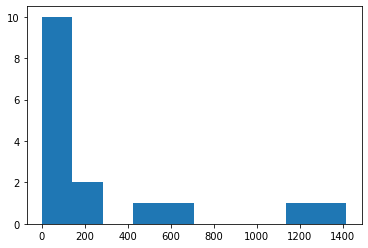

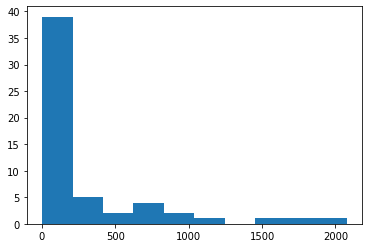

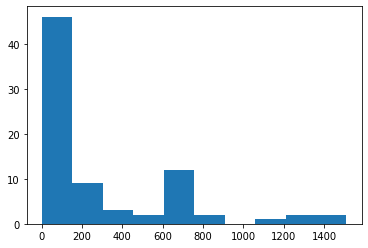

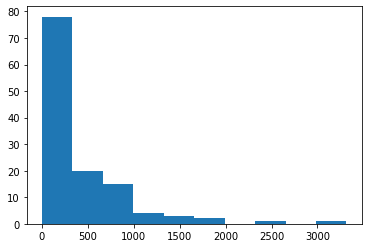

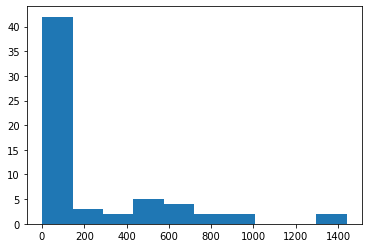

In [ ]:
for i in range(2016,2021):
    df = all_df[all_df["年度"] == i]
    df = df[df["人口"] != 0]
    plt.hist(df["人口"])
    plt.show()

In [ ]:
all_df[[['No.', '区', '発生日時', '出没場所', '状況', 'lat', 'lng', 'KEY_CODE', '年度', '年',
       '月', '日', '曜日', '時間', '人口', '平均気温', '天候（昼）_1', '天候（昼）_2', '天候（夜）_1',
       '天候（夜）_2', 'geometry']]]

KeyError: ignored

In [ ]:
df = all_df[["年度", "月", "人口", "平均気温", "天候（昼）_1", "天候（昼）_2", "天候（夜）_1", "天候（夜）_2"]]

In [ ]:
def get_dummy_features(input_df, columns):
    input_df_ = input_df.copy()
    output_df = pd.DataFrame()

    for c in columns:
        dummy_df = pd.get_dummies(df[c], prefix=c ,drop_first=True)
        output_df = pd.concat([output_df, dummy_df], axis=1)

    return output_df

In [ ]:
get_dummy_features(df, ["年度", "月", "天候（昼）_1", "天候（昼）_2", "天候（夜）_1", "天候（夜）_2"])

,年度_2017,年度_2018,年度_2019,年度_2020,月_4,月_5,月_6,月_7,月_8,月_9,月_10,月_11,月_12,天候（昼）_1_曇,天候（昼）_1_雨,天候（昼）_1_雪,天候（昼）_2_曇,天候（昼）_2_雨,天候（夜）_1_曇,天候（夜）_1_雨,天候（夜）_2_曇,天候（夜）_2_雨
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
559,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
560,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
561,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
def get_num_features(input_df, columns):
    input_df_ = input_df.copy()
    output_df = pd.DataFrame()

    for c in columns:
        output_df[c] = input_df_[c]

    return output_df

In [ ]:
def make_df(input_df, dummy_columns, num_columns):
    input_df_ = input_df.copy()

    dummy_df = get_dummy_features(input_df_, dummy_columns)
    num_df = get_num_features(input_df_, num_columns)

    output_df = pd.concat([dummy_df, num_df], axis=1)

    return output_df

In [ ]:
features_df = make_df(df,
                      ["年度", "月", "天候（昼）_1", "天候（昼）_2", "天候（夜）_1", "天候（夜）_2"],
                      ["人口", "平均気温"])

In [ ]:
features_df.columns

Index(['年度_2017', '年度_2018', '年度_2019', '年度_2020', '月_4', '月_5', '月_6', '月_7',
       '月_8', '月_9', '月_10', '月_11', '月_12', '天候（昼）_1_曇', '天候（昼）_1_雨',
       '天候（昼）_1_雪', '天候（昼）_2_曇', '天候（昼）_2_雨', '天候（夜）_1_曇', '天候（夜）_1_雨',
       '天候（夜）_2_曇', '天候（夜）_2_雨', '人口', '平均気温'],
      dtype='object')

In [ ]:
population_dummy_list = []
for i in features_df["人口"]:
    if i == 0:
        population_dummy_list.append(i)
    else:
        population_dummy_list.append(1)

In [ ]:
log_population_list = []
for i in features_df["人口"]:
    i_ = math.log(i)
    log_population_list.append(i_)

In [ ]:
features_df["人口"] = population_dummy_list

(array([11., 24., 46., 33., 23., 50., 41., 46., 54.,  9.]),
 array([0.        , 0.81062129, 1.62124258, 2.43186387, 3.24248516,
        4.05310645, 4.86372774, 5.67434903, 6.48497032, 7.29559161,
        8.1062129 ]),
 <a list of 10 Patch objects>)

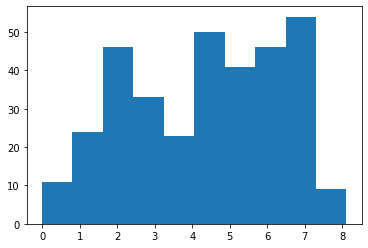

In [ ]:
plt.hist(features_df["人口"])

In [ ]:
df = features_df[['年度_2017', '年度_2018', '年度_2019', '年度_2020', "平均気温", "人口"]]

In [ ]:
df = df[df["人口"] != 0]

In [ ]:
import statsmodels.api as sm

df_X = df.drop('人口', axis=1)
df_y = df['人口']

df_X = sm.add_constant(df_X)

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     人口   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.421
Date:                Fri, 17 Dec 2021   Prob (F-statistic):              0.216
Time:                        17:21:50   Log-Likelihood:                -2538.8
No. Observations:                 337   AIC:                             5090.
Df Residuals:                     331   BIC:                             5113.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        348.9417    137.591      2.536      0.0

In [ ]:
!pip install wooldridge
!pip install see

     |████████████████████████████████| 5.1 MB 5.2 MB/s 


In [ ]:
import numpy as np
from scipy.stats import norm, uniform, gaussian_kde, multivariate_normal
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import wooldridge
from numba import njit
import seaborn as sns
from see import see

In [ ]:
!pip install jismesh
!pip install folium

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.6 MB/s 
     |████████████████████████████████| 6.3 MB 33.1 MB/s 
     |████████████████████████████████| 15.4 MB 14.2 MB/s 


In [ ]:
import geopandas as gpd

import jismesh.utils as ju
import folium
from shapely.geometry import Polygon
import branca.colormap as cm

In [ ]:
def GDF(input_df):
    input_df_ = input_df.copy()
    output_df = gpd.GeoDataFrame(input_df_)
    return output_df

In [ ]:
lat, lng = (42.968448,141.279425)
m = folium.Map((lat, lng), zoom_start=12)
folium.Choropleth(geo_data=GDF(all_df), 
                    name='choropleth',
                    data=GDF(all_df),
                    columns=['KEY_CODE', '人口'],
                    key_on='feature.properties.KEY_CODE',
                    fill_color='YlGn',
                    fill_opacity=0.7,
                    line_opacity=0.2,
                    legend_name='population').add_to(m)

ValueError: ignored